## Getting the required modules

In [1]:
import libraries as lb
import hyperparameters
import neural_net
import Feature_engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import os
os.environ['CUDA_LAUNC_BLOCKING'] = '1'

## Setting up device

In [3]:
device = lb.torch.device('cuda' if lb.torch.cuda.is_available() else 'cpu')
##device = lb.torch.device('cpu')
device

device(type='cuda')

## Feature engineering and loading data

In [4]:
data = Feature_engineering.process_data("Churn_Modelling.csv")
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


## Train-Test split and scaling

In [5]:
y = data["Exited"]
x = data.drop("Exited", axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Loading data in data loader and making a instance

In [6]:
train_loader = lb.DataLoader(dataset= list(zip(x_train, y_train)), batch_size = hyperparameters.batch_size, shuffle = True)
test_loader = lb.DataLoader(dataset = list(zip(x_test, y_test)), batch_size = hyperparameters.batch_size, shuffle = True)

model = neural_net.NN(input_classes = hyperparameters.input_size, output_classes = hyperparameters.output_size).to(device)

## Loss and Optimizer

In [7]:
loss = lb.nn.CrossEntropyLoss()
optimizer = lb.optim.Adam(model.parameters(), lr = hyperparameters.learning_rate)

## Training the network

In [8]:
train_acc = []
test_acc = []

for epoch in range(hyperparameters.num_epochs):
    num_correct = num_samples = 0

    ## Training the model
    for batch_idx, (data_batch, targets) in enumerate(train_loader):
        
        ## Loading data to device available
        data_batch = data_batch.to(device = device).float()
        targets = targets.to(device = device).long()

        ## Doing the forward propagation
        scores = model(data_batch)
        loss_value = loss(scores, targets)

        ## Doing the backward propagation
        optimizer.zero_grad()
        loss_value.backward()

        ## Optimizer step
        optimizer.step()

    print(f"At epoch {epoch+1}/{hyperparameters.num_epochs}:-")

    ## Train accuracy
    for batch_idx, (data_batch, targets) in enumerate(train_loader):
        
        ## Loading data to device available
        data_batch = data_batch.to(device = device).float()
        targets = targets.to(device = device).long()

        ## Doing the forward propagation
        scores = model(data_batch)
        
        _, predictions = scores.max(1)

        num_correct += (predictions == targets).sum()
        num_samples += predictions.size(0)

    print(f"Train accuracy = {float(num_correct)/float(num_samples)*100}")
    train_acc.append(float(num_correct)/float(num_samples)*100)

    ## Test accuracy
    for batch_idx, (data_batch, targets) in enumerate(test_loader):
        
        ## Loading data to device available
        data_batch = data_batch.to(device = device).float()
        targets = targets.to(device = device).long()

        ## Doing the forward propagation
        scores = model(data_batch)
        
        _, predictions = scores.max(1)

        num_correct += (predictions == targets).sum()
        num_samples += predictions.size(0)

    print(f"Test accuracy = {float(num_correct)/float(num_samples)*100}")
    test_acc.append(float(num_correct)/float(num_samples)*100)



At epoch 1/200:-
Train accuracy = 79.45
Test accuracy = 79.63
At epoch 2/200:-
Train accuracy = 84.1375
Test accuracy = 84.06
At epoch 3/200:-
Train accuracy = 84.1375
Test accuracy = 84.17
At epoch 4/200:-
Train accuracy = 84.7625
Test accuracy = 84.68
At epoch 5/200:-
Train accuracy = 85.75
Test accuracy = 85.72999999999999
At epoch 6/200:-
Train accuracy = 86.0625
Test accuracy = 85.96000000000001
At epoch 7/200:-
Train accuracy = 86.45
Test accuracy = 86.33
At epoch 8/200:-
Train accuracy = 86.65
Test accuracy = 86.48
At epoch 9/200:-
Train accuracy = 86.5625
Test accuracy = 86.36
At epoch 10/200:-
Train accuracy = 86.6
Test accuracy = 86.4
At epoch 11/200:-
Train accuracy = 87.0625
Test accuracy = 86.81
At epoch 12/200:-
Train accuracy = 86.8
Test accuracy = 86.42999999999999
At epoch 13/200:-
Train accuracy = 87.075
Test accuracy = 86.79
At epoch 14/200:-
Train accuracy = 87.275
Test accuracy = 86.99
At epoch 15/200:-
Train accuracy = 87.1625
Test accuracy = 86.88
At epoch 16/200

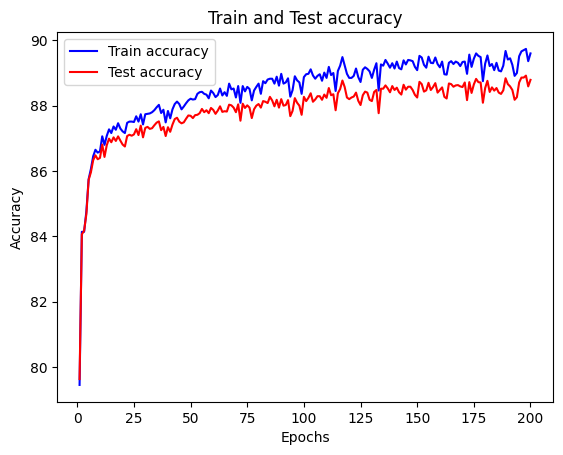

In [9]:
epchs = lb.np.arange(hyperparameters.num_epochs)+1

lb.plt.plot(epchs, train_acc, label = "Train accuracy", color = "blue")
lb.plt.plot(epchs, test_acc, label = "Test accuracy", color = "red")
lb.plt.xlabel("Epochs")
lb.plt.ylabel("Accuracy")
lb.plt.legend()
lb.plt.title("Train and Test accuracy")
lb.plt.show()